In [72]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
from torchsummary import summary
import seaborn as sns


df = pd.read_csv("C:/Users/admin/Desktop/Homework/AI/AI_Class/Data/BP_data.csv", index_col=0)
df

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
Patient_Number,,,,,,,,,,,,,,
1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1


---
    고혈압
    헤모글로빈 수치
    유전적 영향
    나이
    BMI
    성별
    임신
    흡연
    신체활동지수
    식단 염분수치
    알콜 섭취량
    스트레스 수치
    만성질환
    갑상선 장애
---

In [9]:
df.isnull().sum()

Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

---
결측치에 새로운 값을 넣어 의미를 부여하거나 없앤다

    fillna(value)

In [124]:
df["Pregnancy"] = df["Pregnancy"].fillna(0)
df.head()

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
Patient_Number,,,,,,,,,,,,,,
1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
2,0,9.75,0.23,54,33,1,2.0,0,26106,25333,205.0,3,0,0
3,1,10.79,0.91,70,49,0,2.0,0,9995,29465,67.0,2,1,0
4,0,11.00,0.43,71,50,0,2.0,0,10635,7439,242.0,1,1,0
5,1,14.17,0.83,52,19,0,2.0,0,15619,49644,397.0,2,0,0


In [217]:
df["Genetic_Pedigree_Coefficient"] = df["Genetic_Pedigree_Coefficient"].fillna(2)
df.head()

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
Patient_Number,,,,,,,,,,,,,,
1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,0.0,2,1,1
2,0,9.75,0.23,54,33,1,2.0,0,26106,25333,205.0,3,0,0
3,1,10.79,0.91,70,49,0,2.0,0,9995,29465,67.0,2,1,0
4,0,11.00,0.43,71,50,0,2.0,0,10635,7439,242.0,1,1,0
5,1,14.17,0.83,52,19,0,2.0,0,15619,49644,397.0,2,0,0


In [132]:
df["alcohol_consumption_per_day"] = df["alcohol_consumption_per_day"].fillna(0)
df.head()

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
Patient_Number,,,,,,,,,,,,,,
1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,0.0,2,1,1
2,0,9.75,0.23,54,33,1,2.0,0,26106,25333,205.0,3,0,0
3,1,10.79,0.91,70,49,0,2.0,0,9995,29465,67.0,2,1,0
4,0,11.00,0.43,71,50,0,2.0,0,10635,7439,242.0,1,1,0
5,1,14.17,0.83,52,19,0,2.0,0,15619,49644,397.0,2,0,0


In [134]:
df.isnull().sum()

Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

---
# countplot
    값의 갯수

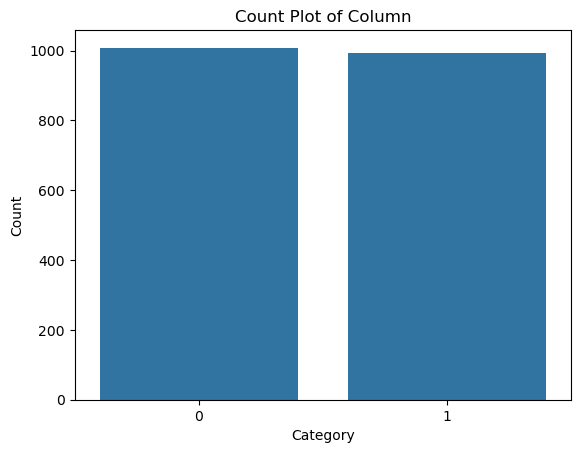

In [137]:
sns.countplot(x='Sex', data=df)
plt.title('Count Plot of Column')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

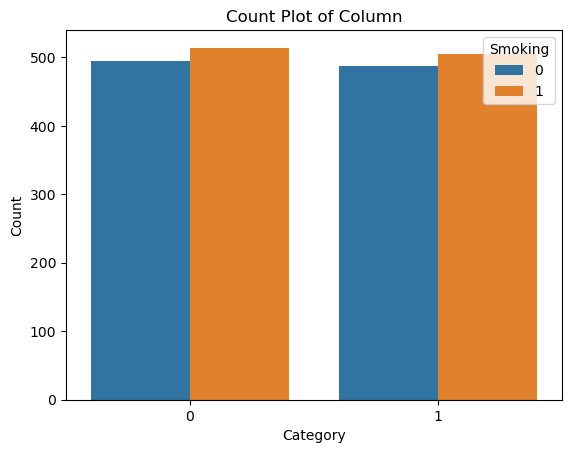

In [58]:
sns.countplot(x='Sex', hue="Smoking", data=df)
plt.title('Count Plot of Column')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

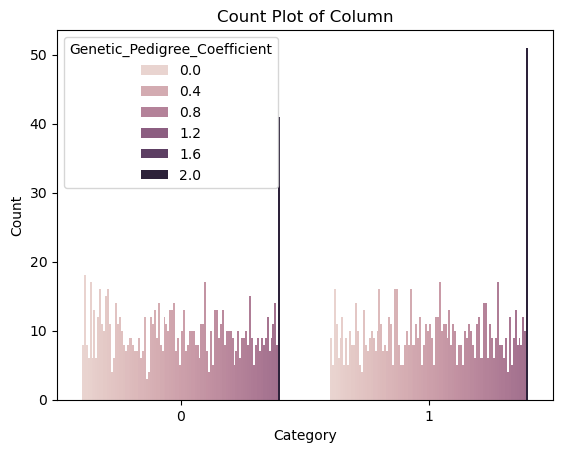

In [60]:
sns.countplot(x='Sex', hue="Genetic_Pedigree_Coefficient", data=df)
plt.title('Count Plot of Column')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

---
# boxplot
    값의 범위

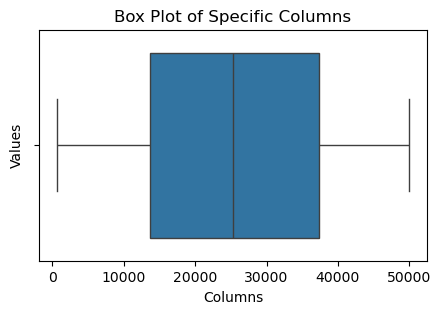

In [109]:
plt.figure(figsize=(5, 3))

# 특정 컬럼만 선택하여 boxplot 그리기
sns.boxplot(x='Physical_activity', data=df)
# df[['Blood_Pressure_Abnormality', 'Physical_activity']].boxplot()
# sns.boxplot(x='Blood_Pressure_Abnormality', y='Sex', data=df)
plt.title('Box Plot of Specific Columns')
plt.ylabel('Values')
plt.xlabel('Columns')
# plt.grid(True)  # 격자 추가 (선택 사항)
plt.show()

---
# Volinplot
    밀도

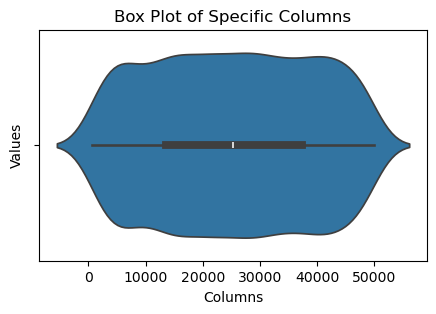

In [115]:
plt.figure(figsize=(5, 3))

# 특정 컬럼만 선택하여 boxplot 그리기
sns.violinplot(x='Physical_activity', data=df)
# df[['Blood_Pressure_Abnormality', 'Physical_activity']].boxplot()
# sns.boxplot(x='Blood_Pressure_Abnormality', y='Sex', data=df)
plt.title('Box Plot of Specific Columns')
plt.ylabel('Values')
plt.xlabel('Columns')
# plt.grid(True)  # 격자 추가 (선택 사항)
plt.show()

---
# heatmap
    상관관계

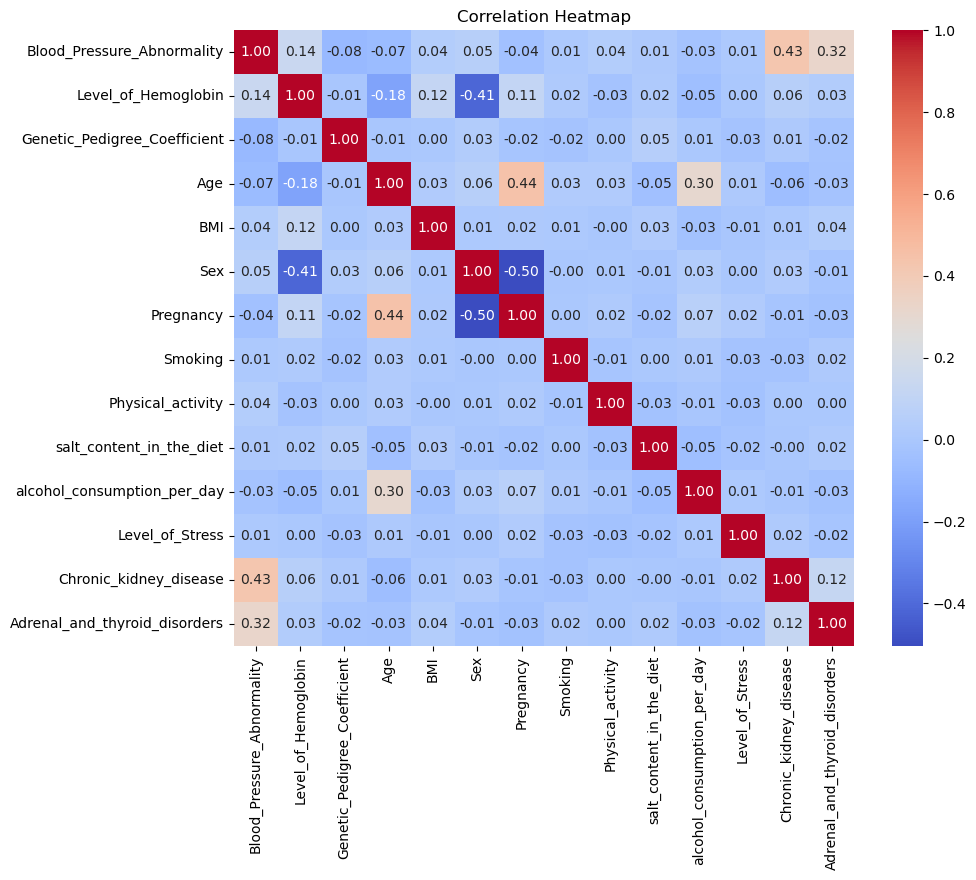

In [141]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

---
# histplot
    분포

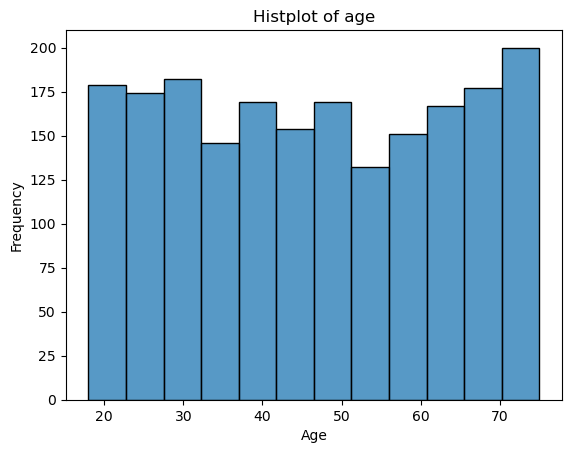

In [168]:
 # plt.figure(figsize=(8, 8))
sns.histplot(data=df, x="Age")
plt.title(f'Histplot of age')
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.show()

---
# kdeplot

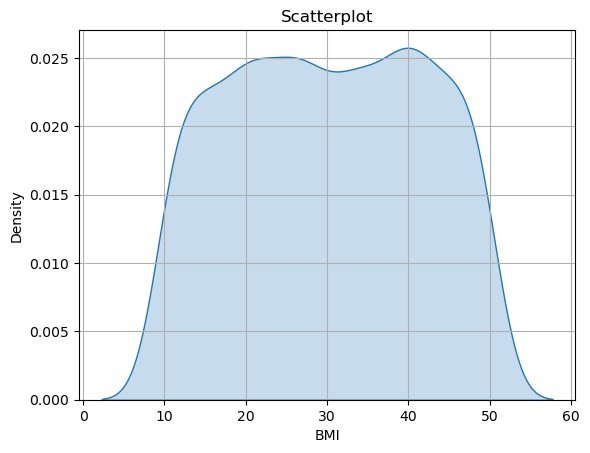

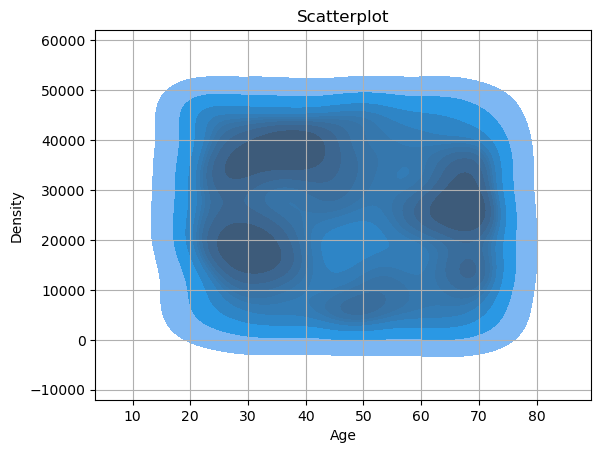

In [227]:
sns.kdeplot(data=df, x="Age", y="salt_content_in_the_diet", fill=True)
plt.title(f'Scatterplot')
plt.xlabel("Age")
plt.ylabel("Density")
plt.grid(True)
plt.show()


---
# displot

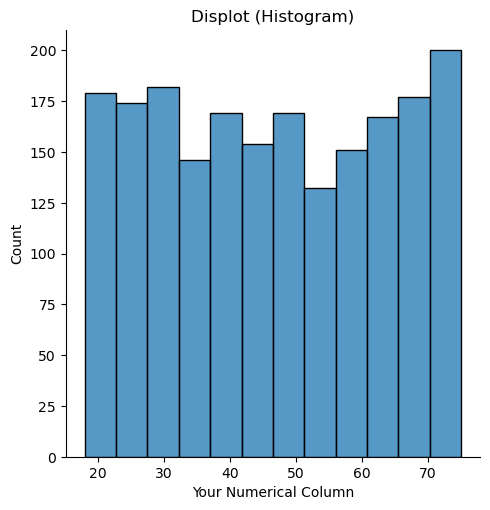

In [211]:
sns.displot(data=df, x='Age', kind='hist')
plt.title('Displot (Histogram)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

---
# scatterplot

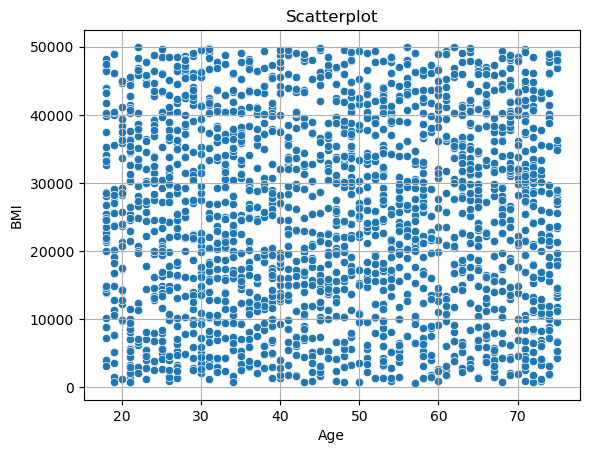

In [219]:
sns.scatterplot(data=df, x="Age", y="Physical_activity")
plt.title(f'Scatterplot')
plt.xlabel("Age")
plt.ylabel("BMI")
plt.grid(True)
plt.show()

---
# plot

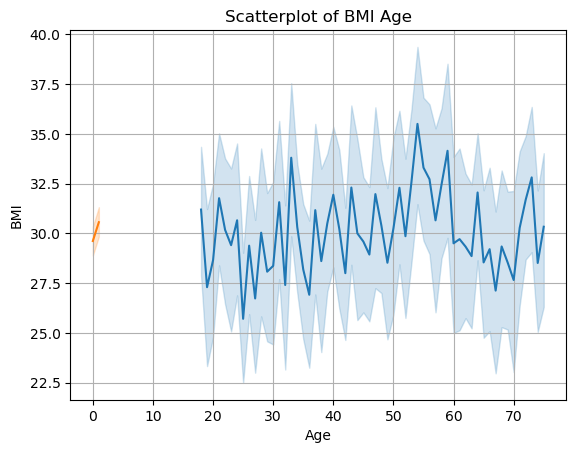

In [215]:
sns.lineplot(data=df, x="Age", y="BMI")
# sns.lineplot(data=df, x="Age", y="Blood_Pressure_Abnormality")
plt.title(f'Scatterplot of BMI Age')
plt.xlabel("Age")
plt.ylabel("BMI")
plt.grid(True)
plt.show()